Loading Dataset

In [1]:
import pandas as pd

In [4]:
drug_df=pd.read_csv(r'C:\Users\DEVANSH BOLSURE\Dropbox\My PC (LAPTOP-9PET8DJR)\Documents\anime\MOVIES\python_practice\for_job\ci_cd_project\Data\drug200.csv')
drud_df=drug_df.sample(frac=1)
drug_df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [7]:
from sklearn.model_selection import train_test_split
x=drug_df.drop('Drug',axis=1)
y=drug_df['Drug']


In [48]:
print(x.shape,y.shape)

(200, 5) (200,)


Train Test Split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=125)

In [49]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(140, 5) (140,) (60, 5) (60,)


Machine Learning Pipeline

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

cat_col=[1,2,3]
num_col=[0,4]

transform=ColumnTransformer(
    [
        ('encoder',OrdinalEncoder(),cat_col),
        ('num_imputer',SimpleImputer(strategy='median'),num_col),
        ('num_scaler',StandardScaler(),num_col)
    ]
)

pipe=Pipeline(
    steps=[
        ('preprocessing',transform),
        ('model',RandomForestClassifier(n_estimators=100,random_state=150))
    ]
)

pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=150))])

Model Evaluation

In [16]:
from sklearn.metrics import classification_report
y_pred=pipe.predict(x_test)
report=classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.75      0.86         4
       drugC       1.00      0.75      0.86         8
       drugX       0.89      1.00      0.94        17

    accuracy                           0.95        60
   macro avg       0.95      0.90      0.91        60
weighted avg       0.96      0.95      0.95        60



In [18]:
with open(r'C:\Users\DEVANSH BOLSURE\Dropbox\My PC (LAPTOP-9PET8DJR)\Documents\anime\MOVIES\python_practice\for_job\ci_cd_project\Result\metrics.txt','w') as outfile:
    outfile.write(f'\nclassification_report = {report}')

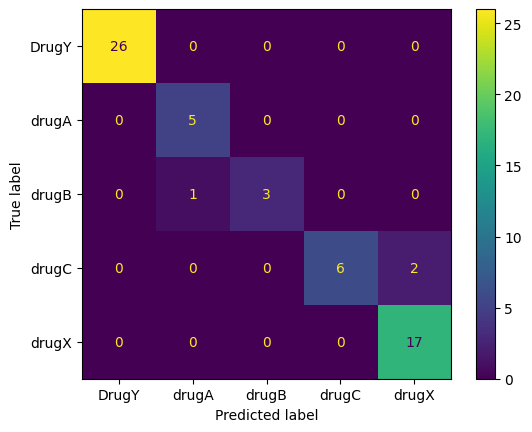

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=pipe.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_)
disp.plot()
plt.savefig(r'C:\Users\DEVANSH BOLSURE\Dropbox\My PC (LAPTOP-9PET8DJR)\Documents\anime\MOVIES\python_practice\for_job\ci_cd_project\Result\model_results.png',dpi=120)

Saving the Model

In [33]:
import skops.io as sio

sio.dump(pipe,r'C:\Users\DEVANSH BOLSURE\Dropbox\My PC (LAPTOP-9PET8DJR)\Documents\anime\MOVIES\python_practice\for_job\ci_cd_project\Model\drug_pipeline.skops')

In [43]:
from skops import io as sio

file_path = r'C:\Users\DEVANSH BOLSURE\Dropbox\My PC (LAPTOP-9PET8DJR)\Documents\anime\MOVIES\python_practice\for_job\ci_cd_project\Model\drug_pipeline.skops'

# Open the file in binary mode
with open(file_path, "rb") as f:
    untrusted = sio.get_untrusted_types(file=f)


print(untrusted)


['numpy.dtype']


In [ ]:
import numpy as np

trusted = ['np.dtype']

with open(file_path,'rb') as f:
    model = sio.load(file=f, trusted=untrusted)
    
print(model)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=150))])
